## Table of Content

- Iterative Solver Example
- Anaytical Solution for Linear Solution using OLS
- Gradient Descend (GD) Implemetation using Numpy
- Creating a Funtion for GD and adding convergence Criterion
- Plots related to GD and its analysis.
- Stochastic GD Implementation

The purpose of this notebook is to simplify the concept behing OLS and Gradient Descend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ITERATIVE SOLVER

In [104]:
from scipy.optimize import fsolve

In [105]:
fx = lambda x: 2*x**2 - 3*x + 1
fsolve(fx, 0), fsolve(fx, 1.5)    #fzero fn in MATLAB

(array([0.5]), array([1.]))

In [106]:
from scipy.optimize import minimize

In [107]:
minimize(fx, 0)   # fsolve for minimization

      fun: -0.125
 hess_inv: array([[0.25]])
      jac: array([1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.74999999])

In [108]:
fx = lambda x: 20*x**2 - 30*x + 10

In [109]:
minimize(fx, 0, method='Powell')

   direc: array([[1.]])
     fun: array(-1.25)
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 2
  status: 0
 success: True
       x: array([0.75])

In [110]:
from scipy.integrate import quad    #quadgk

In [111]:
quad(fx, 0, 10)

(5266.666666666668, 5.848121462879976e-11)

In [112]:
import matplotlib.pyplot as plt
import numpy as np

In [113]:
fx1 = lambda x: 2*x**2 - 3*x + 1
fx2 = lambda x: 4*x**2 - 6*x + 2
x = np.arange(0,1.5, 0.01)

In [114]:
x[fx1(x).argmin()], fx1(x).min()

(0.75, -0.125)

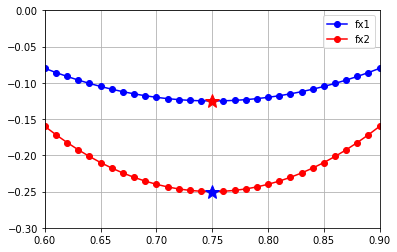

In [115]:
plt.plot(x, fx1(x), 'b-o', label='fx1')
plt.plot(x[fx1(x).argmin()], fx1(x).min(), 'r*', markersize=15)
plt.plot(x, fx2(x), 'r-o', label='fx2')
plt.plot(x[fx2(x).argmin()], fx2(x).min(), 'b*', markersize=15)
plt.xlim([0.6, 0.9])
plt.ylim([-0.3, 0])
plt.legend()
plt.grid(True)

### Analytical Solution for Linear Regression  using OLS

In [116]:
from sklearn.datasets import load_boston

In [117]:
boston = load_boston()
X = boston.data
Y = boston.target

In [118]:
X.shape, Y.shape

((506, 13), (506,))

In [119]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [120]:
ones_col = np.ones((len(X), 1))
# ones_col

In [121]:
import pandas as pd
X1 = np.hstack([ones_col, X])
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [122]:
X1.T.dot(X1).shape

(14, 14)

In [123]:
np.linalg.inv(X1.T.dot(X1)).shape

(14, 14)

In [124]:
np.linalg.inv(X1.T.dot(X1)).dot(X1.T).shape

(14, 506)

In [125]:
W = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(Y)
W

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [126]:
y_hat = X1.dot(W)
y_hat[:5].round(2)

array([30.  , 25.03, 30.57, 28.61, 27.94])

In [127]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

In [128]:
LR.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
LR.predict(X[:5]).round(2)

array([30.  , 25.03, 30.57, 28.61, 27.94])

In [130]:
LR.intercept_, LR.coef_

(36.45948838509001,
 array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
        -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
         3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]))

In [131]:
LR.rank_, X.shape

(13, (506, 13))

In [132]:
X = np.array([[1,2,3], [4,5,6], [7,8,9]])
X

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [133]:
np.linalg.inv(X)

array([[ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15],
       [-6.30503948e+15,  1.26100790e+16, -6.30503948e+15],
       [ 3.15251974e+15, -6.30503948e+15,  3.15251974e+15]])

In [134]:
np.linalg.det(X)   # X is close to singular matrix >> det ~ 0, and its inverse doesn't exist . Hence it is not reliable

-9.51619735392994e-16

In [135]:
np.linalg.det(X1.T.dot(X1))

1.1401940782175881e+53

In [136]:
X2 = np.array([[1, 1, 3], [1,2,6], [1,3,9]])
X2

array([[1, 1, 3],
       [1, 2, 6],
       [1, 3, 9]])

In [137]:
np.linalg.matrix_rank(X2)

2

In [138]:
np.linalg.det(X2) #, np.linalg.inv(X2)

0.0

In [139]:
np.corrcoef(X2)

array([[1.        , 0.98198051, 0.97072534],
       [0.98198051, 1.        , 0.99862543],
       [0.97072534, 0.99862543, 1.        ]])

In [140]:
Y.shape, X1.shape

((506,), (506, 14))

In [141]:
import statsmodels.api as sm

In [142]:
model = sm.OLS(Y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 01 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        13:23:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### Gradient Descent (GD)  Python Code

In [150]:
X=np.array([[1,1],[1,3],[1,5]])  # Constant column W0
X

array([[1, 1],
       [1, 3],
       [1, 5]])

In [151]:
Y=np.array([4.8,11.3,17.2]).reshape(-1,1)
Y

array([[ 4.8],
       [11.3],
       [17.2]])

In [152]:
W=np.array([0,0]).reshape(-1,1)
W

array([[0],
       [0]])

In [153]:
y_hat=X.dot(W)
y_hat

array([[0],
       [0],
       [0]])

In [154]:
L=np.mean((y_hat-Y)**2).round(3)
L

148.857

In [155]:
error_term=(y_hat-Y)*X
error_term=error_term.sum(axis=0).reshape(-1,1)
error_term

array([[ -33.3],
       [-124.7]])

In [156]:
W=W-(0.01*error_term)   # Updates Weights
W

array([[0.333],
       [1.247]])

### GD function with Convergence Criterion 

We can further experiment with the values of alpha and W .

In [157]:
# Function to perform the Same

X=np.array([[1,1],[1,3],[1,5]])
Y=np.array([4.8,11.3,17.2]).reshape(-1,1)

W0 = [0]
W1 = [0]
Loss = [np.nan]

W = np.array([0,0]).reshape(-1,1)
alpha = 0.05 # Learning-rate
for k in range(1,1000):
    Y_hat = X.dot(W)
    error = (Y_hat-Y)*X
    error_sum = error.sum(axis=0).reshape(-1,1)
    
    W = W - (alpha*error_sum)
    W0.append(W[0,0])
    W1.append(W[1,0])
    
    L = np.mean((Y_hat-Y)**2)
    Loss.append(L)
    
    # Convergence Criteria
    if (Loss[k] - Loss[k-1]) >0:   # It means out loss is increasing
        print('The algorithm is NOT Converging.... Exiting')
        break
    elif (Loss[k-1] - Loss[k]) < 1e-7:  # Loss has decreased 
        print('Tolerance for the Loss function has been reached.. Optim. converged successfully')
        break
    elif np.abs(W0[k] - W0[k-1]) < 1e-5:
        print('Tolerance for the W0 has been reached.. exiting')
        break
    elif np.abs(W1[k] - W1[k-1]) < 1e-6:
        print('Tolerance for the W1 has been reached.. exiting')
        break
else:
    print('Maximum iterations Reached!')

[k, W0[-1], W1[-1], L]

Tolerance for the Loss function has been reached.. Optim. converged successfully


[182, 1.7975719111046564, 3.1006360404942415, 0.020001440197527084]

In [158]:
# Analytical Solution( Exact Solution) calculated using OLS 

Analytical_W=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
Analytical_W

array([[1.8],
       [3.1]])

### Plots for Analysis 

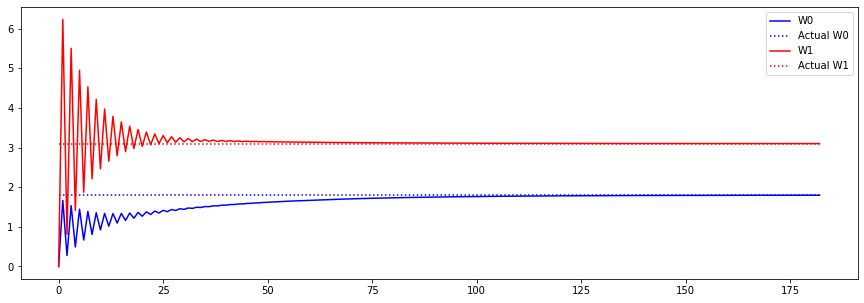

In [159]:
# Ploting the W0,W1 against the iterations 

itr = list(range(len(W0)))

plt.figure(figsize=(15,5))
plt.plot(itr, W0, 'b-', label='W0')
plt.plot(itr, np.ones(len(W0))*Analytical_W[0], 'b:', label='Actual W0')

plt.plot(itr, W1, 'r-', label='W1')
plt.plot(itr, np.ones(len(W1))*Analytical_W[1], 'r:', label='Actual W1')

plt.legend()

As we can see that after some iterations W0 & W1 have reached their their Optimum Point which was calculated using the OLS.

In [160]:
t=np.linspace(1,5,101).reshape(-1,1)  # Always make another varialbe similar to X but never use X directly
t=np.hstack([np.ones(len(t)).reshape(-1,1),t])

y_hat=t.dot(W)


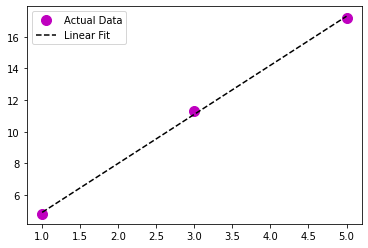

In [161]:
# Plot for Predicted Y against Actaul Y
plt.plot(X[:,1],Y,'mo',markersize=10,label='Actual Data')

plt.plot(t[:,1],y_hat,'k--',markersize=10,label='Linear Fit')
plt.legend()

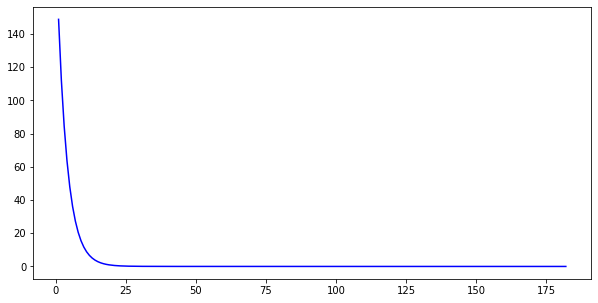

In [162]:
# Plot for Loss Function

plt.figure(figsize=(10,5))
plt.plot(itr, Loss, 'b-', label='Loss Fn')

As we can see that afer some Iterations the Loss Function has started decreasing at a very low rate .
At this point we can say that as the number of iterations are increasing our Loss Function is decreasing at a very low rate. Hence we can inc are alpha.

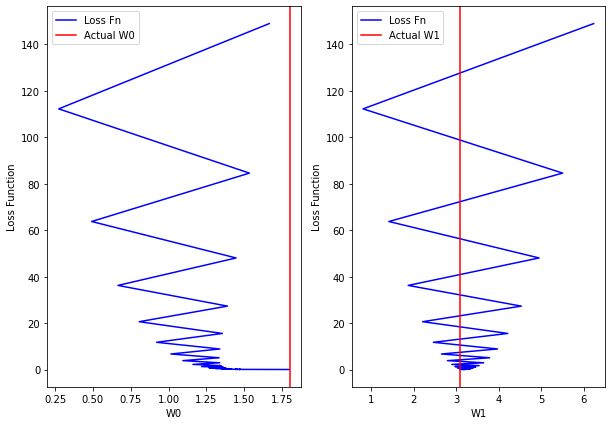

In [163]:
# Analytical_W
fir,ax=plt.subplots(1,2,figsize=(10,7))

# plt.figure(figsize=(10,5))
ax[0].plot(W0, Loss, 'b-', label='Loss Fn')
ax[0].axvline(x=Analytical_W[0], color='r',label='Actual W0')
ax[0].set_xlabel('W0')
ax[0].set_ylabel('Loss Function')
ax[0].legend()

ax[1].plot(W1, Loss, 'b-', label='Loss Fn')
ax[1].axvline(x=Analytical_W[1], color='r',label='Actual W1')
ax[1].set_xlabel('W1')
ax[1].set_ylabel('Loss Function')
ax[1].legend()



In the above plot we can see that W0 & W1 reaches the acual_W as the loss function decreases

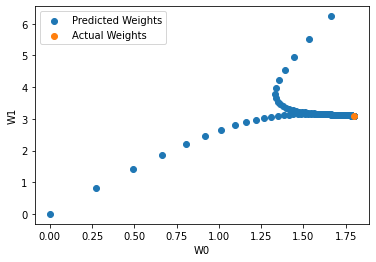

In [164]:
plt.scatter(W0,W1,label='Predicted Weights')
plt.scatter(Analytical_W[0],Analytical_W[1],label='Actual Weights')

plt.xlabel('W0')
plt.ylabel('W1')
plt.legend()

plt.show()

## Stochastic GD Implementation 

In [165]:
X=np.array([[1,1],[1,3],[1,5]])
Y=np.array([4.8,11.3,17.2]).reshape(-1,1)
L_iter=[]  
error_terms=[0]*Y.shape[0]
y_hat=np.zeros(Y.shape)
W=np.array([0,0])
epoch=[]

In [166]:
y_hat[0]=X[0].dot(W)
error_terms[0] = (y_hat[0] - Y[0])*X[0]
loss=((y_hat[0] - Y[0])**2 )[0]  # For each epoch

L_iter.append(loss)
L_iter



[23.04]

In [167]:
W=W-(0.01*error_terms[0])
W

array([0.048, 0.048])

In [168]:
y_hat[1]=X[1].dot(W)
error_terms[1] = (y_hat[1] - Y[1])*X[1]
loss=((y_hat[1] - Y[1])**2 )[0]

L_iter.append(loss)

In [169]:
W=W-(0.01*error_terms[1])
W

array([0.15908, 0.38124])

In [170]:
y_hat[2]=X[2].dot(W)
error_terms[2] = (y_hat[2] - Y[2])*X[2]

loss=((y_hat[2] - Y[2])**2 )[0]

L_iter.append(loss)

In [171]:
W=W-(0.01*error_terms[2])
W

array([0.3104272, 1.137976 ])

In [172]:
L_iter

[23.04, 123.38766400000002, 229.0597494784]

In [173]:
epoch.append(np.mean((y_hat-Y)**2))  # Loss after epoch should dec

In [174]:
epoch

[125.16247115946668]

In [175]:
Y_hat = np.zeros(Y.shape)
W = np.array([0, 0]); L_itr = []; L_epoch = []
alpha = 0.01
W_array = [W]

In [176]:
for k in range(500):
    Y_hat[0] = X[0].dot(W)
    error_terms[0] = (Y_hat[0] - Y[0])*X[0]
    L_itr.append(((Y_hat[0] - Y[0])**2)[0])
    W = W - (alpha*error_terms[0])

    Y_hat[1] = X[1].dot(W)
    error_terms[1] = (Y_hat[1] - Y[1])*X[1]
    L_itr.append(((Y_hat[1] - Y[1])**2)[0])
    W = W - (alpha*error_terms[1])

    Y_hat[2] = X[2].dot(W)
    error_terms[2] = (Y_hat[2] - Y[2])*X[2]
    L_itr.append(((Y_hat[2] - Y[2])**2)[0])
    W = W - (alpha*error_terms[2])

    L_epoch.append(np.mean((Y_hat - Y)**2))
    W_array.append(W)
    
    if L_epoch[-1]<0.02:
        print('SGD has converged!!')
        break
        

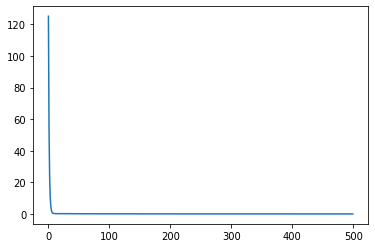

In [177]:
plt.plot(L_epoch)

In [178]:
L_epoch[-1], W

(0.02280310415951331, array([1.77914413, 3.10146661]))

In [179]:
W_array=np.asarray(W_array)

In [180]:
type(W_array)

numpy.ndarray

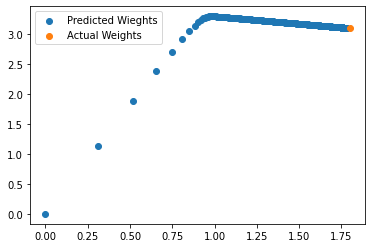

In [181]:
plt.scatter(W_array[:,0],W_array[:,1], label='Predicted Wieghts')
plt.scatter(Analytical_W[0],Analytical_W[1],label='Actual Weights')
plt.legend()